## Bilateral Filter
This is a non-linear filter, its both edge preserving and noise-reducing filter.
The Gaussian smoothing filter replaces the intensity value of a pixel by the weighted sum of its adjacent pixels, that means bigger the kernel size smoother the image.  In the edge-preserving filters we must not be replacing th ecolor of the pixel by the weeighted sum of the neighbors

In OpenCV, the convolution operations are done using the function **`bilateralFilter`** API.  

> Syntax:
``` python
	dst =   cv2.bilateralFilter(    src, d, sigmaColor, sigmaSpace[, dst[, borderType]] )
```

#### Parameters

* **`src`** Source 8-bit or floating-point, 1-channel or 3-channel image.
* **`dst`** Destination image of the same size and type as src .
* **`d`** Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
* **`sigmaColor`** Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
* **`sigmaSpace`** Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
* **`borderType`** border mode used to extrapolate pixels outside of the image, see BorderType

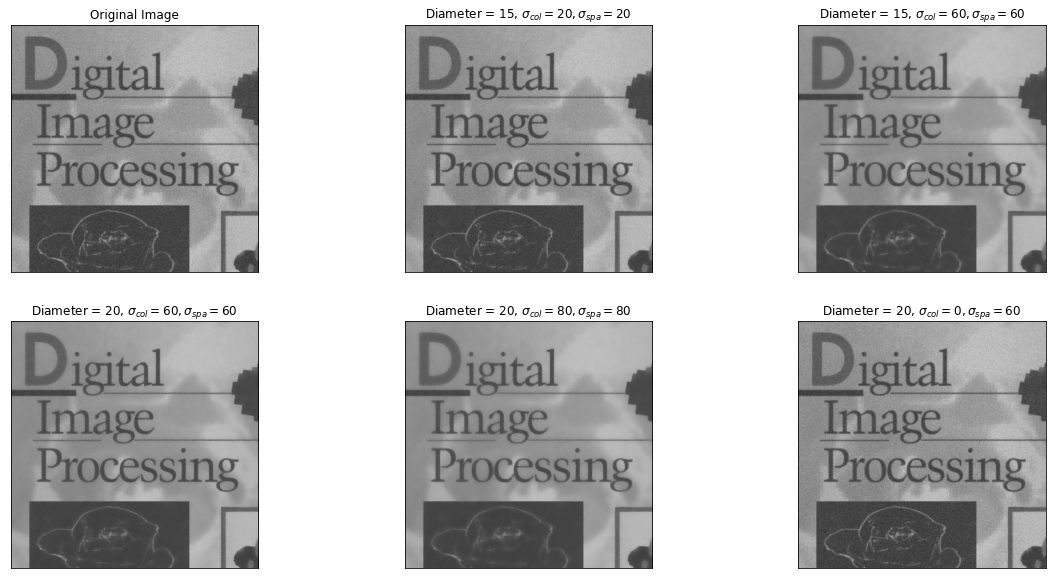

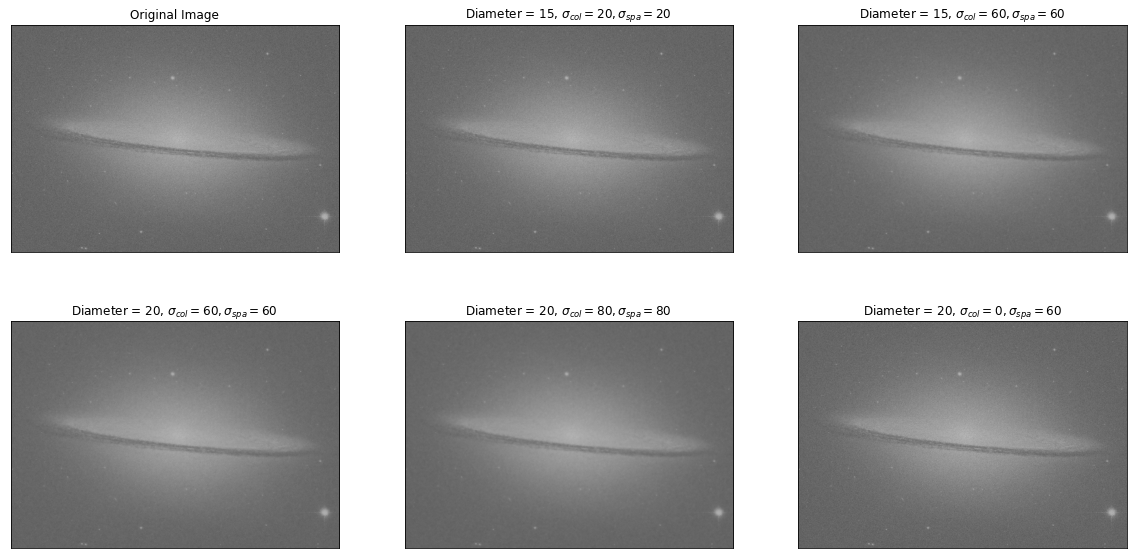

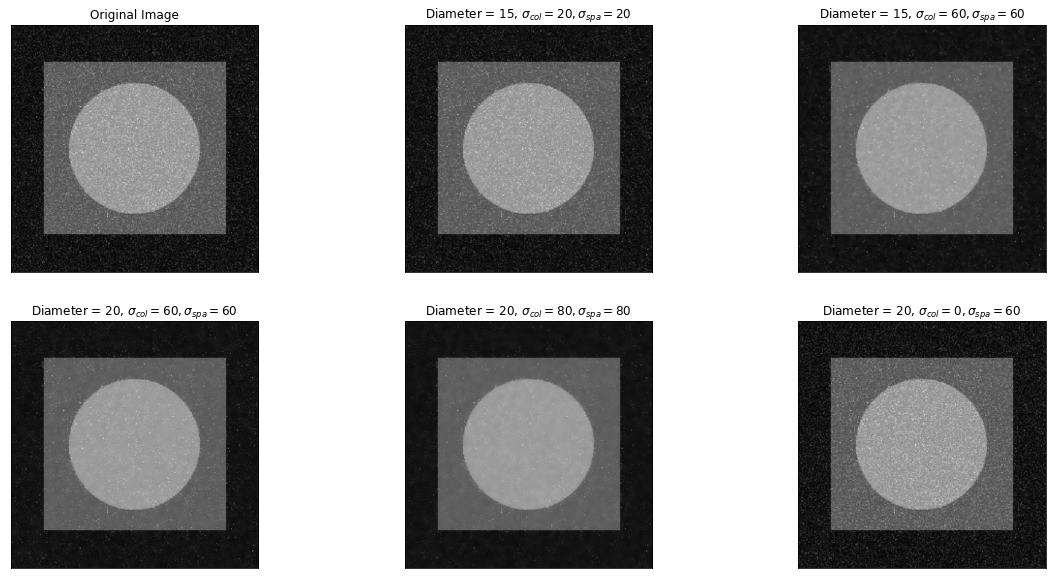

In [1]:
##########################################################################################
# Primary Contact    : v_s191@txstate.edu; vittal.siddaiah@gmail.com;
##########################################################################################
#Image Filtering using Convolution
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
##############################################################################################

##############################################################################################
def BilateralImageFilter(rawImageData, trials):
    figIds = []
    # Generating FigureId's
    maxRows = math.ceil(len(trials)/3)
    figCounter = 0
    for row in range(maxRows):
        for col in range(3):
            figIds.append((maxRows*100)+30+(figCounter + 1))
            figCounter +=1
    plt.figure(figsize=[20,10])          
    counter = 0    
    for trial in trials:
        if (trial[0] > 0):
            diameter = trial[0]
            sigmaColor = trial[1]
            sigmaSpace = trial[2]
            strKernel = r"Diameter = %d, $\sigma_{col} = %d, \sigma_{spa} = %d$" % (diameter, sigmaColor, sigmaSpace)
            plt.subplot(figIds[counter]);
            resultImageData = cv2.bilateralFilter(imageData, diameter, sigmaColor, sigmaSpace)
        else:
            strKernel = "Original Image"
            plt.subplot(figIds[counter]);
            resultImageData = rawImageData
        plt.imshow(resultImageData[..., ::-1])
        plt.xticks([]), plt.yticks([]) #To remove the ticks
        plt.title(strKernel)
        counter += 1
    return 


##############################################################################################  
# Design of Experiment
##############################################################################################  
#trial = [diameter, sigmaColor, sigmaSpace]
trial0 = [0, 0, 0] # Original Image
trial1 = [15, 20, 20]
trial2 = [15, 60, 60]
trial3 = [20, 60, 60]
trial4 = [20, 80, 80]
trial5 = [20, 0, 60]
##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/book-cover-gaussian.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
BilateralImageFilter(imageData, [trial0, trial1, trial2, trial3, trial4, trial5])

##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/sombrero-galaxy-noisy.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
BilateralImageFilter(imageData, [trial0, trial1, trial2, trial3, trial4, trial5])

##############################################################################################


##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/test-pattern-gamma-noise.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
BilateralImageFilter(imageData, [trial0, trial1, trial2, trial3, trial4, trial5])
##############################################################################################


